(213, 223)


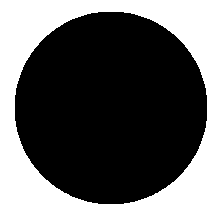

29207


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np



img=cv2.imread('circular shape.jpeg')

# plt.imshow(img)
# b,g,r = cv2.split(img)       # get b,g,r
# img = cv2.merge([r,g,b])     # switch it to rgb

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)

ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# binary=binary/255
print(binary.shape)
cv2_imshow(binary)
cv2.imwrite('binary.jpg',binary)

invert = cv2.bitwise_not(binary)

# contours, hierarchy = cv2.findContours(invert, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# image_copy = image.copy()
# image_copy = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# # print(invert.shape)
# cv2_imshow(image_copy)
# cv2_imshow(invert)
# cv2.imwrite('invert.jpg',invert)


number_of_black_pix = np.sum(binary == 0)
print(number_of_black_pix)

# resized=cv2.resize(binary,(50,100))
# cv2_imshow(resized)

In [ ]:
!unzip "/content/threshold_shape_dataset.zip" -d "/content/threshold"

Archive:  /content/threshold_shape_dataset.zip
  inflating: /content/threshold/threshold_shape_dataset/ROI_0.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_1.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_10.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_100.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_101.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_102.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_103.png  
 extracting: /content/threshold/threshold_shape_dataset/ROI_104.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_105.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_11.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_12.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_13.png  
  inflating: /content/threshold/threshold_shape_dataset/ROI_14.png  
  inflating: /content/threshold/threshold_shape_data

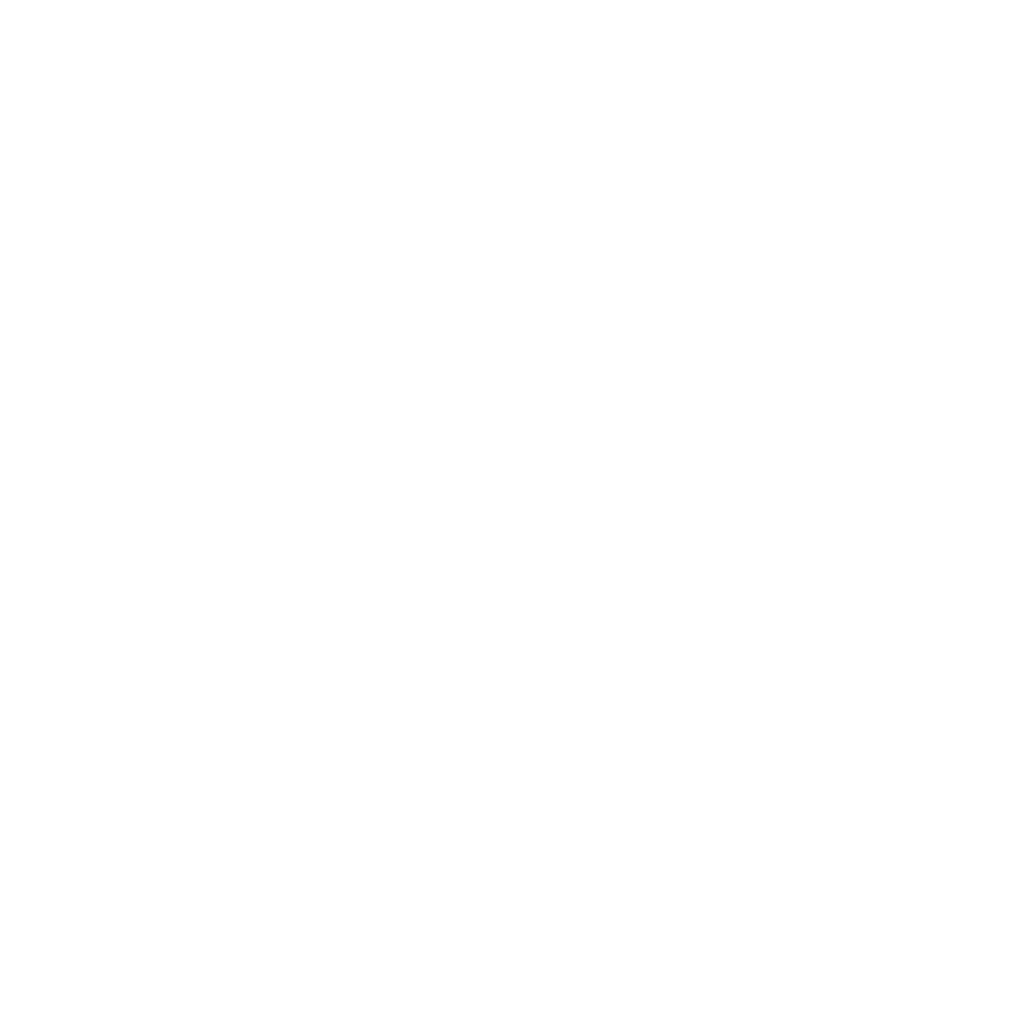

In [ ]:
width, height = 1024, 1024  # Specify the dimensions of the image
background_color = (255, 255, 255)  # RGB values for white
image = np.zeros((height, width, 3), dtype=np.uint8)
image[:] = background_color
cv2_imshow(image)
cv2.imwrite('image.jpg',image)
background=cv2.imread('image.jpg')

In [ ]:
from PIL import Image

def transparency(image_totrans):

  img = image_totrans
  img=Image.fromarray(image_totrans)
  img = img.convert("RGBA")

  datas = img.getdata()

  # img3=Image.open('back.jpeg')
  # img4=Image.open('actual.png')
  # img4=img4.resize(img3.size)

  newData = []


  for item in datas:





    if item[0] >= 100 and item[1] >= 100 and item[2] >= 100:
      newData.append((255, 255, 255, 0))
    else:
      newData.append(item)


  img.putdata(newData)

  return img

In [ ]:
import cv2
from google.colab.patches import cv2_imshow



def alphaMerge(small_foreground, background, top, left):
    """
    Puts a small BGRA picture in front of a larger BGR background.
    :param small_foreground: The overlay image. Must have 4 channels.
    :param background: The background. Must have 3 channels.
    :param top: Y position where to put the overlay.
    :param left: X position where to put the overlay.
    :return: a copy of the background with the overlay added.
    """
    result = background.copy()
    # From everything I read so far, it seems we need the alpha channel separately
    # so let's split the overlay image into its individual channels
    fg_b, fg_g, fg_r, fg_a = cv2.split(small_foreground)
    # Make the range 0...1 instead of 0...255
    fg_a = fg_a / 255.0
    # Multiply the RGB channels with the alpha channel
    label_rgb = cv2.merge([fg_b * fg_a, fg_g * fg_a, fg_r * fg_a])

    # Work on a part of the background only
    height, width = small_foreground.shape[0], small_foreground.shape[1]
    part_of_bg = result[top:top + height, left:left + width, :]
    # Same procedure as before: split the individual channels
    bg_b, bg_g, bg_r = cv2.split(part_of_bg)
    # Merge them back with opposite of the alpha channel
    part_of_bg = cv2.merge([bg_b * (1 - fg_a), bg_g * (1 - fg_a), bg_r * (1 - fg_a)])

    # Add the label and the part of the background
    cv2.add(label_rgb, part_of_bg, part_of_bg)
    # Replace a part of the background
    result[top:top + height, left:left + width, :] = part_of_bg
    return result

In [ ]:
import imutils
import random

def rotate_image(image,angle):

  invert=cv2.bitwise_not(image)

  rotated = imutils.rotate(invert, angle)
  rotated_invert=cv2.bitwise_not(rotated)
  return rotated_invert


In [ ]:
#Bimodal
import math
import numpy as np
# print(foreground.shape)
mean=50.0
std_dev=10.0

mean2=75.0
std_dev2=10.0
foreground=cv2.imread('circular shape.jpeg')
foreground=cv2.resize(foreground,(62,62))
num_particles = math.ceil((((image.shape[0]*image.shape[1])/(foreground.shape[0]*foreground.shape[1]))+100)/2)
particle_sizes = np.random.normal(mean, std_dev, num_particles)
particle_sizes2=np.random.normal(mean2,std_dev2,num_particles)
particle_sizes=np.append(particle_sizes,particle_sizes2)
particle_sizes=[math.ceil(i) for i in particle_sizes]
print(particle_sizes)
print(len(particle_sizes))

[47, 42, 61, 43, 64, 41, 58, 47, 35, 52, 51, 55, 52, 38, 58, 46, 39, 58, 55, 57, 51, 48, 38, 56, 55, 55, 51, 47, 43, 54, 57, 59, 34, 60, 57, 54, 37, 44, 43, 67, 55, 34, 64, 52, 58, 41, 50, 45, 53, 59, 55, 36, 47, 54, 56, 43, 56, 56, 44, 44, 50, 45, 57, 49, 51, 50, 35, 38, 34, 52, 55, 34, 62, 46, 55, 60, 42, 36, 56, 47, 51, 70, 47, 46, 65, 54, 66, 59, 60, 43, 62, 73, 42, 51, 42, 56, 56, 52, 67, 63, 63, 49, 51, 41, 38, 38, 72, 51, 39, 43, 46, 42, 46, 46, 64, 39, 60, 34, 50, 59, 37, 47, 61, 51, 29, 41, 52, 78, 53, 42, 45, 63, 71, 40, 67, 17, 48, 40, 19, 48, 45, 58, 66, 45, 65, 63, 34, 67, 46, 37, 45, 49, 53, 35, 55, 49, 70, 51, 56, 57, 27, 58, 62, 49, 50, 64, 54, 35, 47, 59, 57, 60, 51, 59, 66, 42, 32, 35, 46, 47, 52, 54, 55, 40, 61, 49, 52, 87, 71, 66, 77, 66, 80, 92, 75, 69, 93, 71, 69, 86, 72, 70, 88, 68, 69, 66, 85, 79, 86, 77, 82, 74, 73, 69, 74, 87, 75, 64, 81, 71, 81, 73, 72, 65, 78, 64, 84, 81, 79, 55, 101, 76, 90, 76, 85, 67, 72, 61, 73, 70, 91, 71, 97, 76, 75, 73, 82, 83, 76, 88

In [ ]:
# #Gaussian
# mean=50.0
# std_dev=10.0

# foreground=cv2.imread('circular shape.jpeg')
# foreground=cv2.resize(foreground,(50,50))
# num_particles=math.ceil((image.shape[0]*image.shape[1]/(foreground.shape[0]*foreground.shape[1])))
# particle_sizes=np.random.normal(mean,std_dev,num_particles)
# particle_sizes=[math.ceil(i) for i in particle_sizes]
# print(particle_sizes[10])
# print(len(particle_sizes))

48
420


In [ ]:
def overlap(result,x0,y0,width):

  flag=0



  for i in range(x0,x0+width):
    for j in range(y0,y0+width):

      if(result[i][j][0]==0 and result[i][j][1]==0 and result[i][j][2]==0):
        flag=1

  return flag

In [ ]:
def inside_hyperbole(x0,y0):
  ans=x0*y0-250000
  return ans

50


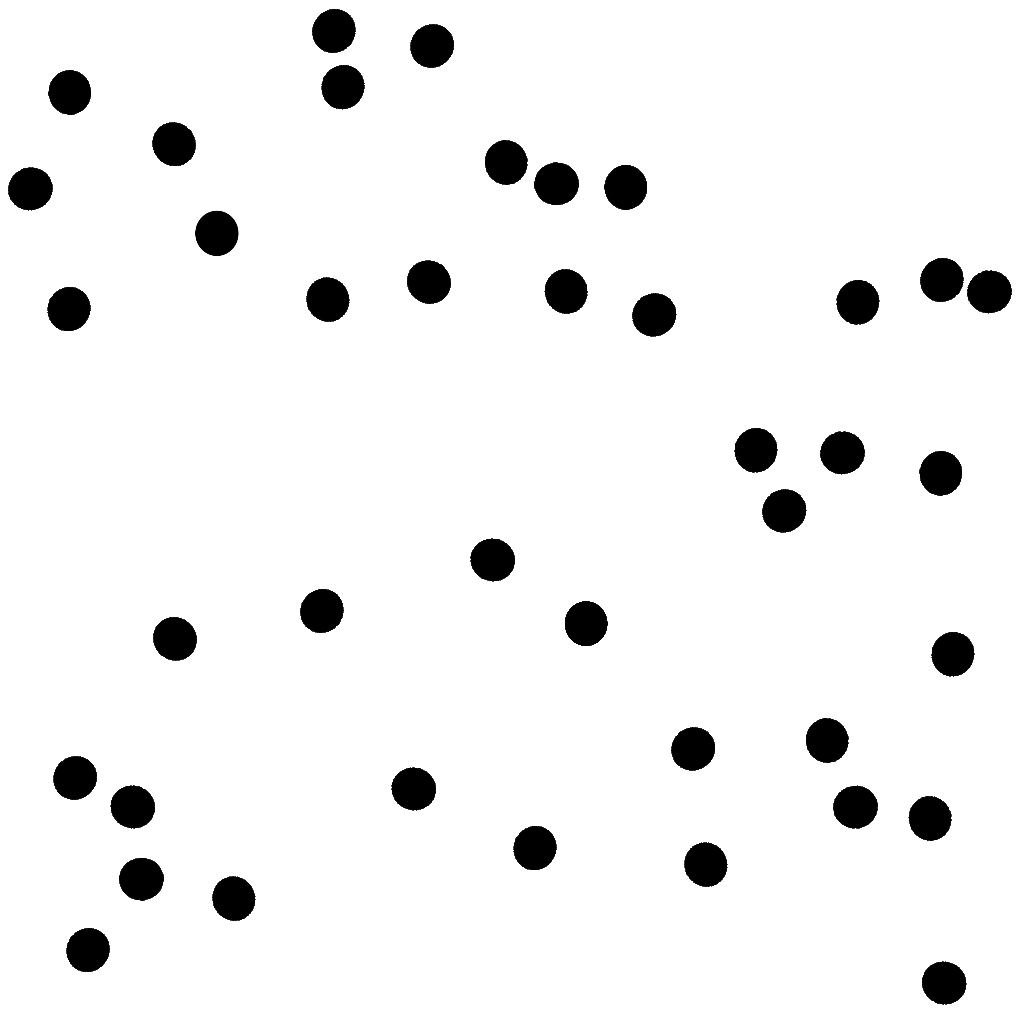

255


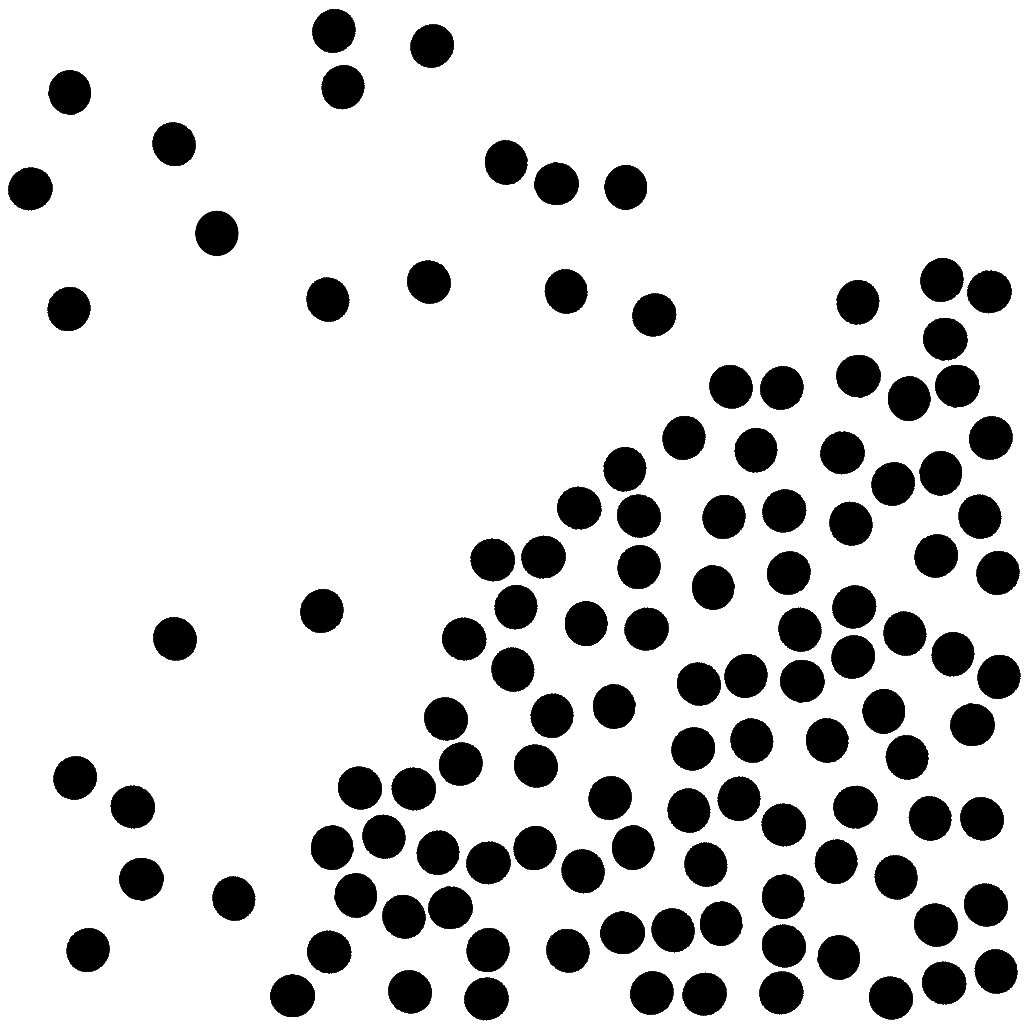

(1024, 1024, 3)
0.1
537837


In [ ]:
# for i in range(N):
import math
import glob
for l in range(5,6):


  i=0
  j=0
  area_fraction=0.05
  foreground=cv2.imread('circular shape.jpeg')

  foreground=cv2.resize(foreground,(50,50))
  print(foreground.shape[0])

  foreground=np.array(foreground)
  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
  i+=np.sum(foreground==0)
  while i < area_fraction*(image.shape[0]*image.shape[1]*3):

    foreground=cv2.imread('circular shape.jpeg')
    foreground=cv2.resize(foreground,(50,50))
    x1=random.randint(50,100)
    # print(j)
    # k=random.randint(0,len(particle_sizes)-1)
    foreground=cv2.resize(foreground,(50,50))
    number_of_black_pix = np.sum(foreground ==0)

    x0=random.randint(0,1024-foreground.shape[0])
    y0=random.randint(0,1024-foreground.shape[1])
    if(overlap(result,x0,y0,50)):
      continue
    i+=number_of_black_pix

    angle=random.randint(-180,180)
    foreground=rotate_image(foreground,angle)
    foreground=transparency(foreground)
    foreground=np.array(foreground)
    foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
    j=j+1




    result=alphaMerge(foreground,result,x0,y0)

  # blur = cv2.GaussianBlur(result, (0,0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
  # ret, binary = cv2.threshold(blur, 127 ,255, cv2.THRESH_BINARY)
  # cv2_imshow(binary)
  # print(binary)
  cv2_imshow(result)

  # result=binary
  cv2.imwrite('result.png',result)
  print(result[12][12][2])
  # print(i)
  # print(j)

  #Distribution Hyperbolical
  j=0
  i=0
  foreground=cv2.resize(foreground,(50,50))
  area_fraction=0.1
  foreground=np.array(foreground)

  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  # result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
  # result = alphaMerge(foreground, result, 900, 900)

  i+=np.sum(foreground==0)
  while i < area_fraction*(image.shape[0]*image.shape[1]*3):

    foreground=cv2.imread('circular shape.jpeg')
    foreground=cv2.resize(foreground,(50,50))
    x1=random.randint(50,100)
    # k=random.randint(0,len(particle_sizes)-1)
    foreground=cv2.resize(foreground,(50,50))
    number_of_black_pix = np.sum(foreground ==0)

    x0=random.randint(0,1024-foreground.shape[0])
    y0=random.randint(0,1024-foreground.shape[1])
    if(overlap(result,x0,y0,50)):
      continue



    i+=number_of_black_pix
    ans=-50
    while ans<0:




      x0=random.randint(0,1024-foreground.shape[0])
      y0=random.randint(0,1024-foreground.shape[1])

      if(overlap(result,x0,y0,50)):
        continue
      # flag=over_lap(result,x0,y0,particle_sizes[j])
      # if flag==0:
      #   continue
      ans=inside_hyperbole(x0,y0)
    #   print(ans)
    # print(x0,y0,ans)




    angle=random.randint(-180,180)
    foreground=rotate_image(foreground,angle)
    foreground=transparency(foreground)
    foreground=np.array(foreground)
    foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
    j=j+1




    result=alphaMerge(foreground,result,x0,y0)

  cv2_imshow(result)
  cv2.imwrite('result.png',result)

  print(result.shape)
  print(area_fraction)
  print(np.sum(result<127))
  actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
  actual_area_fraction=round(actual_area_fraction,2)
  actual_area_fraction

  # cv2.imwrite(f'circular_bimodal_distributionhyperbolic_{actual_area_fraction}_{l}.png',result)
  l=l+1


96


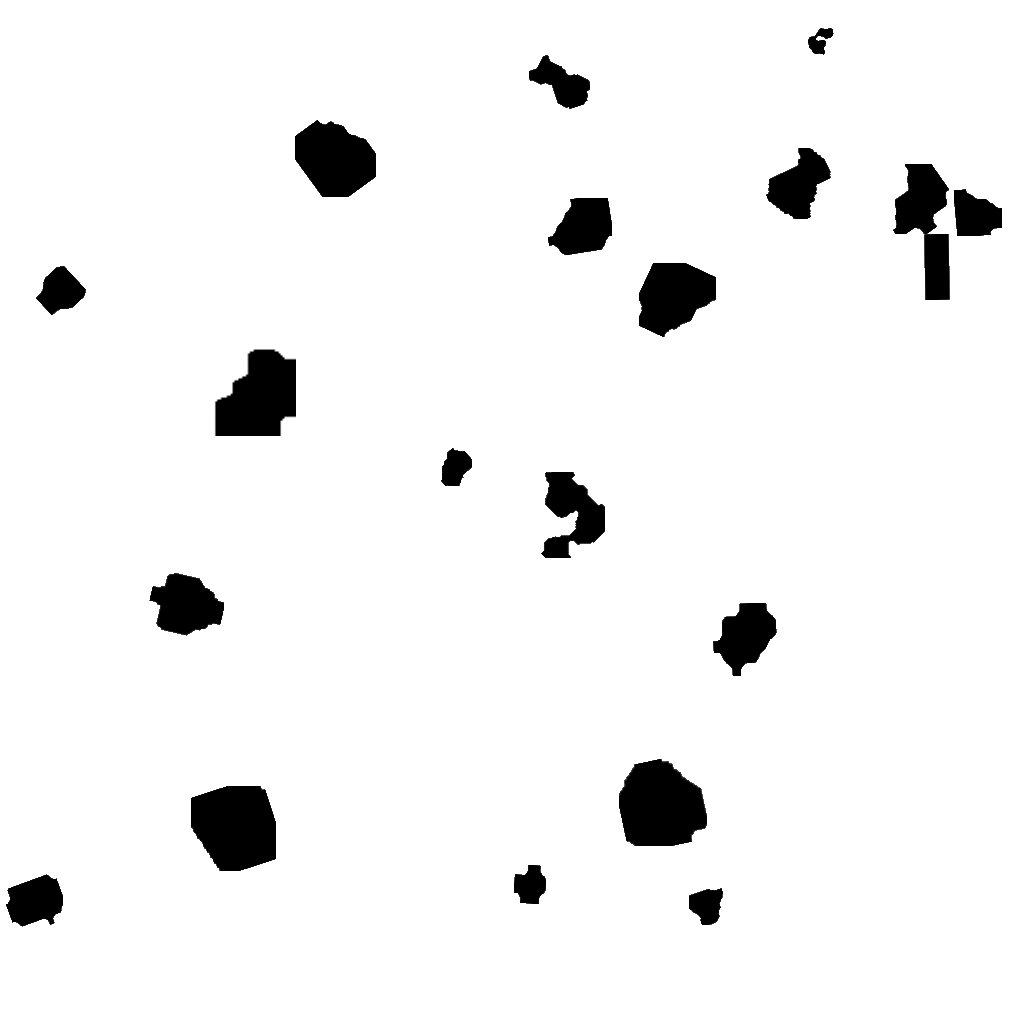

255


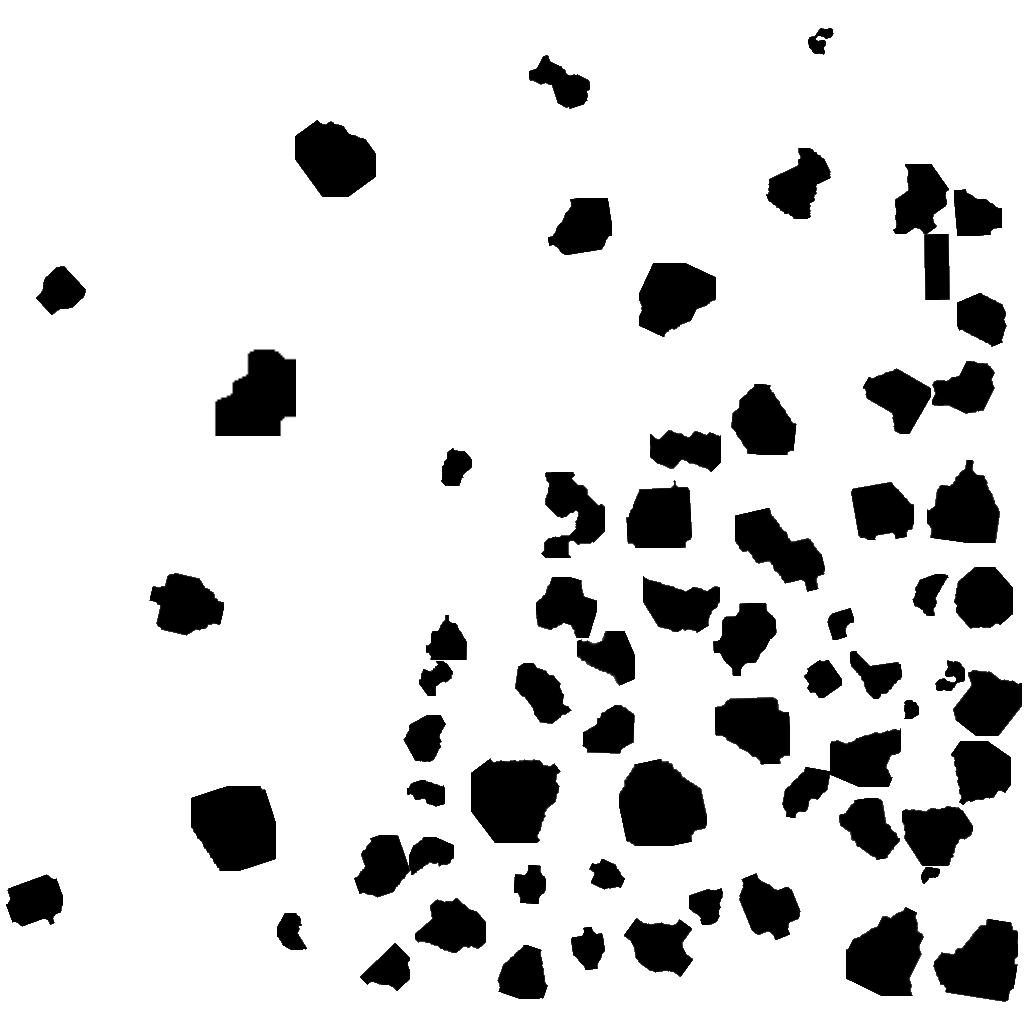

(1024, 1024, 3)
0.1
474330
59


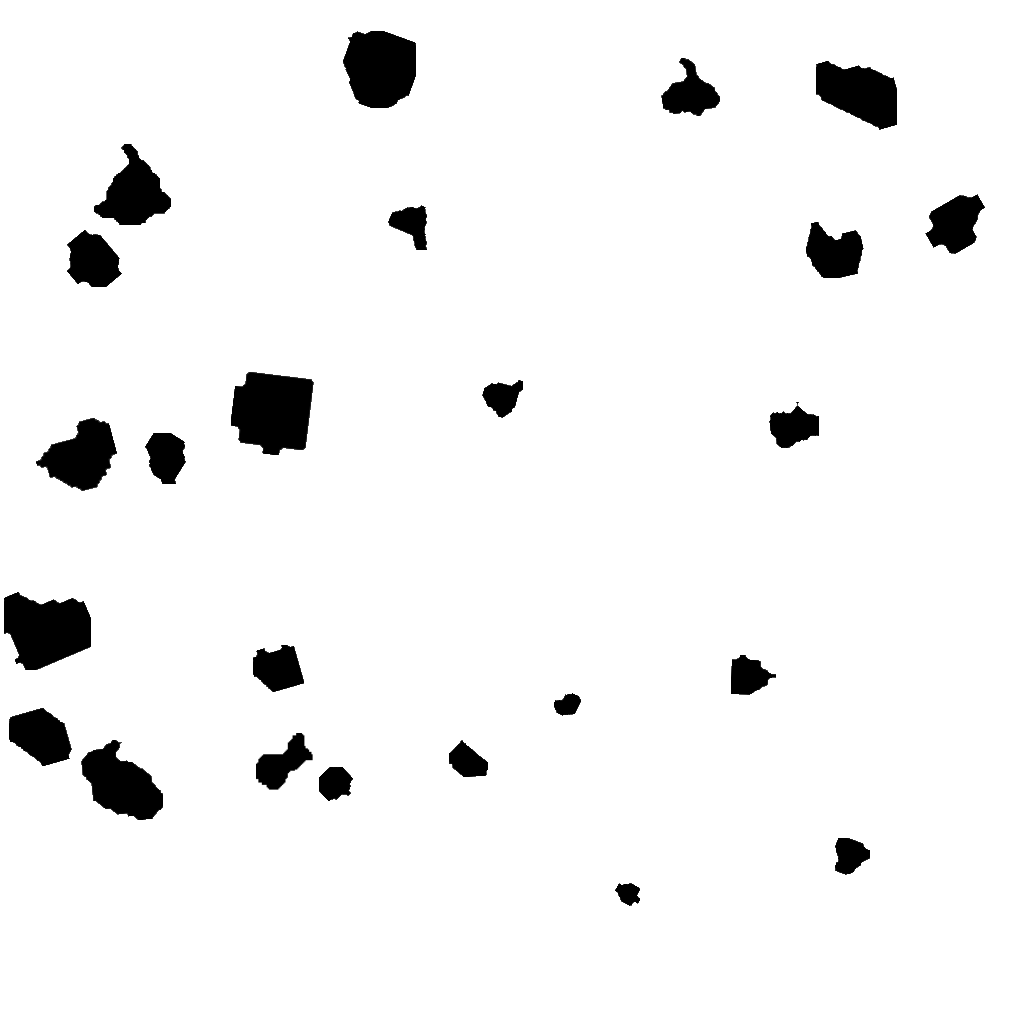

255


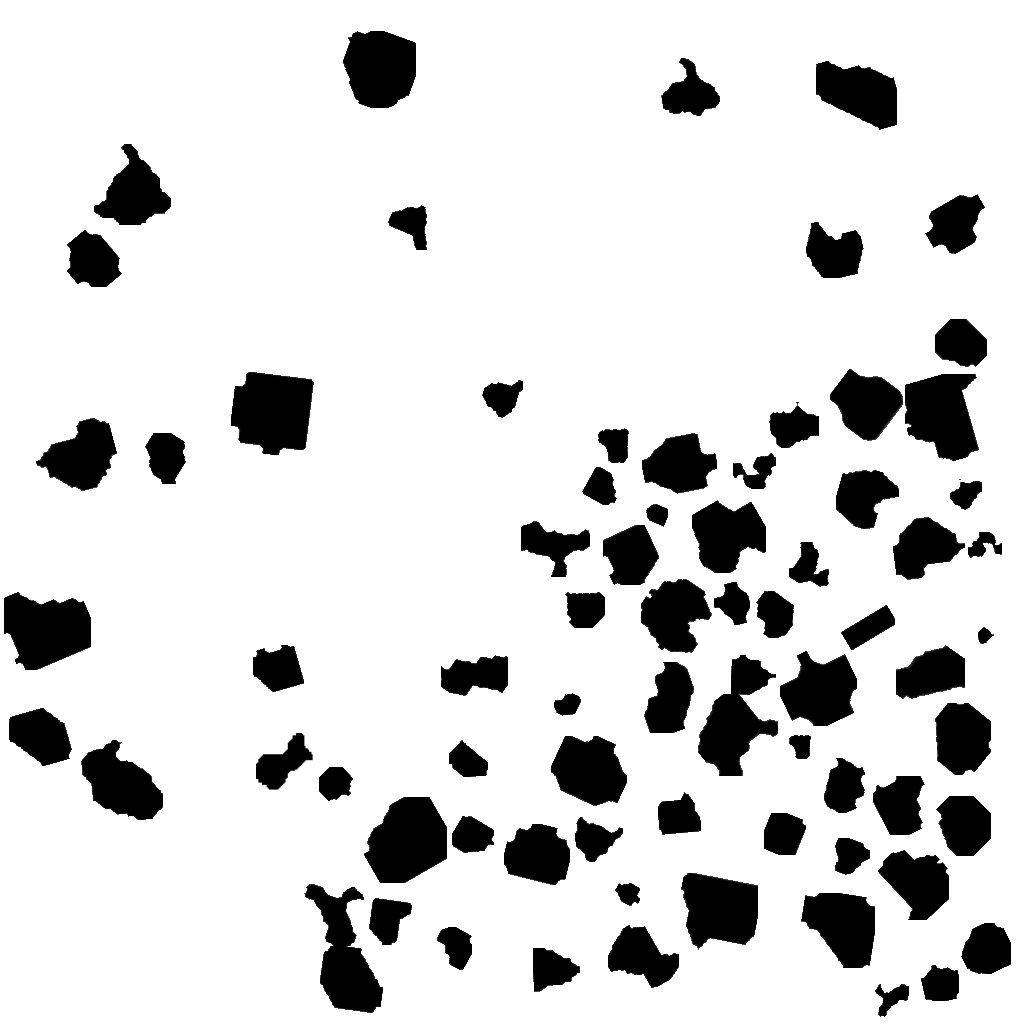

(1024, 1024, 3)
0.1
486981
68


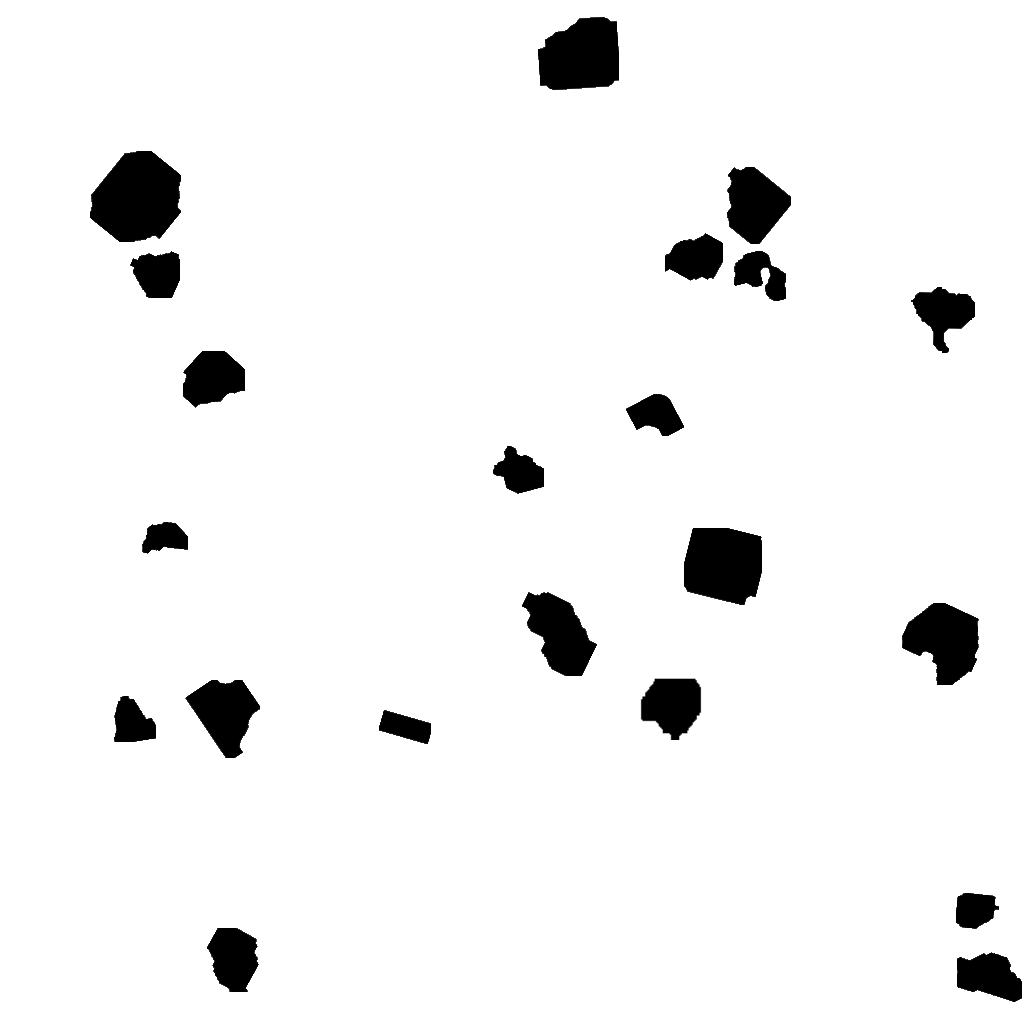

255


KeyboardInterrupt: ignored

In [ ]:
# for i in range(N):
import math
import glob
for l in range(3,6):


  i=0
  j=0
  area_fraction=0.05
  # foreground=cv2.imread('circular shape.jpeg')
  foreground_path_list = glob.glob('threshold/threshold_shape_dataset/*.png')
  foreground_image_path = random.choice(foreground_path_list)
  foreground=cv2.imread(foreground_image_path)
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

  foreground=cv2.resize(foreground,(50,50))

  _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
  foreground[:, :, 0] = thresholded_image
  foreground[:, :, 1] = thresholded_image
  foreground[:, :, 2] = thresholded_image
  k=random.randint(0,len(particle_sizes)-1)

  foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
  print(foreground.shape[0])

  foreground=np.array(foreground)
  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
  i+=np.sum(foreground==0)
  while i < area_fraction*(image.shape[0]*image.shape[1]*3):

    # foreground=cv2.imread('circular shape.jpeg')
    foreground_path_list = glob.glob('threshold/threshold_shape_dataset/*.png')
    foreground_image_path = random.choice(foreground_path_list)
    foreground=cv2.imread(foreground_image_path)
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))

    _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
    foreground[:, :, 0] = thresholded_image
    foreground[:, :, 1] = thresholded_image
    foreground[:, :, 2] = thresholded_image
    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
    x1=random.randint(50,100)
    # print(j)
    k=random.randint(0,len(particle_sizes)-1)
    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
    number_of_black_pix = np.sum(foreground ==0)

    x0=random.randint(0,1024-foreground.shape[0])
    y0=random.randint(0,1024-foreground.shape[1])
    if(overlap(result,x0,y0,particle_sizes[k])):
      continue
    i+=number_of_black_pix

    angle=random.randint(-180,180)
    foreground=rotate_image(foreground,angle)
    foreground=transparency(foreground)
    foreground=np.array(foreground)
    foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
    j=j+1




    result=alphaMerge(foreground,result,x0,y0)

  # blur = cv2.GaussianBlur(result, (0,0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
  # ret, binary = cv2.threshold(blur, 127 ,255, cv2.THRESH_BINARY)
  # cv2_imshow(binary)
  # print(binary)
  cv2_imshow(result)

  # result=binary
  cv2.imwrite('result.png',result)
  print(result[12][12][2])
  # print(i)
  # print(j)

  #Distribution Hyperbolical
  j=0
  i=0
  foreground_path_list = glob.glob('threshold/threshold_shape_dataset/*.png')
  foreground_image_path = random.choice(foreground_path_list)
  foreground=cv2.imread(foreground_image_path)
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
  k=random.randint(0,len(particle_sizes)-1)

  foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))

  _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
  foreground[:, :, 0] = thresholded_image
  foreground[:, :, 1] = thresholded_image
  foreground[:, :, 2] = thresholded_image
  foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
  area_fraction=0.1
  foreground=np.array(foreground)

  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  # result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
  # result = alphaMerge(foreground, result, 900, 900)

  i+=np.sum(foreground==0)
  while i < area_fraction*(image.shape[0]*image.shape[1]*3):

    # foreground=cv2.imread('circular shape.jpeg')
    foreground_path_list = glob.glob('threshold/threshold_shape_dataset/*.png')
    foreground_image_path = random.choice(foreground_path_list)
    foreground=cv2.imread(foreground_image_path)
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

    foreground=cv2.resize(foreground,(50,50))

    _, thresholded_image = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    foreground = np.zeros((thresholded_image.shape[0], thresholded_image.shape[1], 3), dtype=np.uint8)
    foreground[:, :, 0] = thresholded_image
    foreground[:, :, 1] = thresholded_image
    foreground[:, :, 2] = thresholded_image
    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
    x1=random.randint(50,100)
    k=random.randint(0,len(particle_sizes)-1)
    foreground=cv2.resize(foreground,(particle_sizes[k],particle_sizes[k]))
    number_of_black_pix = np.sum(foreground ==0)

    x0=random.randint(0,1024-foreground.shape[0])
    y0=random.randint(0,1024-foreground.shape[1])
    if(overlap(result,x0,y0,particle_sizes[k])):
      continue



    i+=number_of_black_pix
    ans=-50
    while ans<0:




      x0=random.randint(0,1024-foreground.shape[0])
      y0=random.randint(0,1024-foreground.shape[1])

      if(overlap(result,x0,y0,particle_sizes[k])):
        continue
      # flag=over_lap(result,x0,y0,particle_sizes[j])
      # if flag==0:
      #   continue
      ans=inside_hyperbole(x0,y0)
    #   print(ans)
    # print(x0,y0,ans)




    angle=random.randint(-180,180)
    foreground=rotate_image(foreground,angle)
    foreground=transparency(foreground)
    foreground=np.array(foreground)
    foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
    j=j+1




    result=alphaMerge(foreground,result,x0,y0)

  cv2_imshow(result)
  cv2.imwrite('result.png',result)

  print(result.shape)
  print(area_fraction)
  print(np.sum(result<127))
  actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
  actual_area_fraction=round(actual_area_fraction,2)
  actual_area_fraction

  cv2.imwrite(f'irregular_bimodal_distributionhyperbolic_{actual_area_fraction}_{l}.png',result)
  l=l+1


In [ ]:
print(foreground.shape)

(97, 97, 4)


In [ ]:
  print(result.shape)
  print(area_fraction)
  print(np.sum(result<127))
  actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
  actual_area_fraction=round(actual_area_fraction,2)
  actual_area_fraction

  cv2.imwrite(f'irregular_bimodal_distributionhyperbolic_{actual_area_fraction}_{l}.png',result)




(1024, 1024, 3)
0.1
462558


True

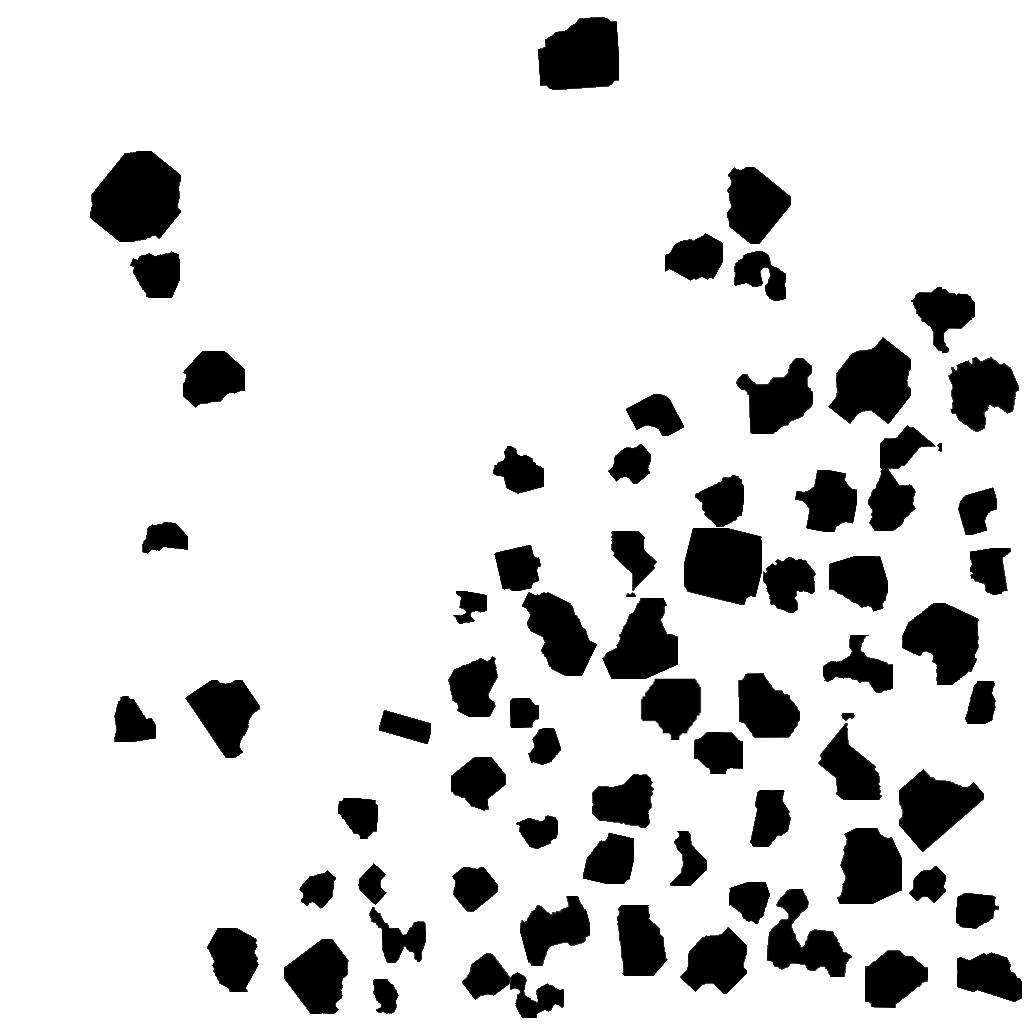

In [ ]:
cv2_imshow(result)

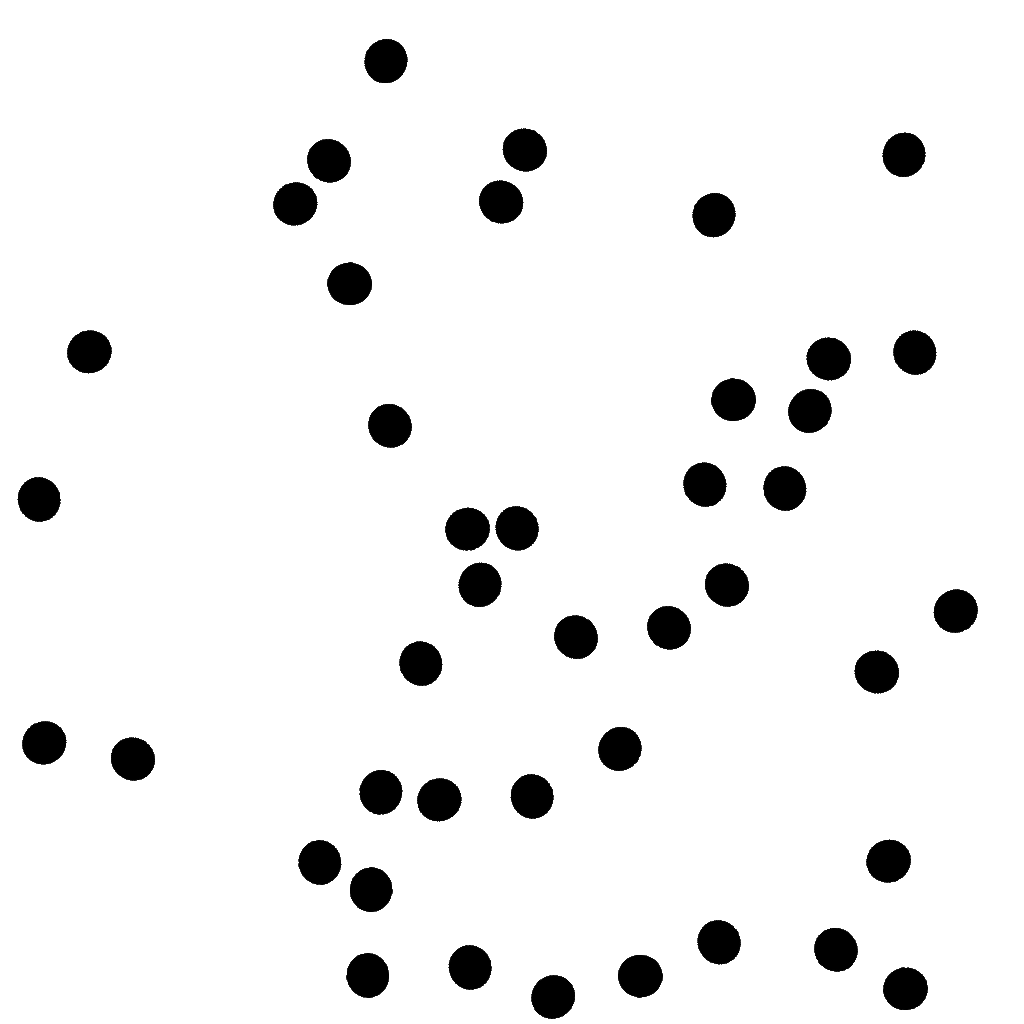

True

In [ ]:
#Distribution Hyperbolical
j=0
i=0
foreground=cv2.resize(foreground,(50,50))
area_fraction=0.07
foreground=np.array(foreground)

foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
# result = alphaMerge(foreground, background, random.randint(0,1024-foreground.shape[0]), random.randint(0,1024-foreground.shape[1]))
# result = alphaMerge(foreground, result, 900, 900)

i+=np.sum(foreground==0)
while i < area_fraction*(image.shape[0]*image.shape[1]):

  foreground=cv2.imread('circular shape.jpeg')
  foreground=cv2.resize(foreground,(50,50))
  x1=random.randint(50,100)
  # foreground=cv2.resize(foreground,(particle_sizes[j],particle_sizes[j]))
  number_of_black_pix = np.sum(foreground ==0)

  x0=random.randint(0,1024-foreground.shape[0])
  y0=random.randint(0,1024-foreground.shape[1])
  if(overlap(result,x0,y0,50)):
    continue



  i+=number_of_black_pix
  ans=-50
  while ans<0:




    x0=random.randint(0,1024-foreground.shape[0])
    y0=random.randint(0,1024-foreground.shape[1])

    if(overlap(result,x0,y0,50)):
      continue
    # flag=over_lap(result,x0,y0,particle_sizes[j])
    # if flag==0:
    #   continue
    ans=inside_hyperbole(x0,y0)
  #   print(ans)
  # print(x0,y0,ans)




  angle=random.randint(-180,180)
  foreground=rotate_image(foreground,angle)
  foreground=transparency(foreground)
  foreground=np.array(foreground)
  foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2BGRA)
  j=j+1




  result=alphaMerge(foreground,result,x0,y0)

cv2_imshow(result)
cv2.imwrite('result.png',result)


In [ ]:
#Check area_fraction
import math
print(result.shape)
print(area_fraction)
print(np.sum(result<127))
actual_area_fraction=math.ceil(np.sum(result<127))/(1024*1024*3)
actual_area_fraction=round(actual_area_fraction,2)
actual_area_fraction

(1024, 1024, 3)
0.07
191451


0.06

In [ ]:
l=2

In [ ]:
cv2.imwrite(f'circular_singlemode_distributionhyperbolic_{actual_area_fraction}_{l}.png',result)
l=l+1